In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt
import math

# Perceptron 1
a)

$$
\begin{aligned}
C(P, N) &= 2\sum_{i=0}^{N-1} \binom{P-1}{i}\\
\text{If $P=N$: }\\
C(P,N) &= 2 \sum_{i=0}^{P-1} \binom{P-1}{i}\\
&= 2 \sum_{i=0}^{P-1} \binom{P-1}{i} \cdot 1^i\\
&= 2(1 + 1)^{P-1} \quad\text{(by the formula in the second hint)}\\
&= 2 \cdot 2^{P-1} = 2^P\\
\end{aligned}
$$

For P points, given that we are dealing with a binary classification problem, the total number of colorings that can be made is $2^P$. Since the number of linearly separable problems, $C(P, N)=2^P$ for $P=N$, that must mean all problems are linearly separable for $P=N$. \\\\
In the case of $P<N$:

$$
\begin{aligned}
    C(P, N) &= 2\sum_{i=0}^{N-1} \binom{P-1}{i}\\
    &= 2\left(\sum_{i=0}^{P-1} \binom{P-1}{i} + \sum_{i=P}^{N-1} \binom{P-1}{i}\right)\\
    &= 2\sum_{i=0}^{P-1} \binom{P-1}{i}\cdot 1^i \\
    &\text{(because in the sum on the right, $i>(P-1) \implies \binom{P-1}{i} = 0$)}\\
    &= 2^P \text{(equivalent to above)}
\end{aligned}
$$

So for all $P \leq N$, $C(P,N)=2^P$ and therefore all problems with $P \leq N$ are linearly separable.\\\\

b)

If $P = 2N$:
$$
\begin{aligned}
    C(2N, N) &= 2 \sum_{i=1}^{N-1} \binom{2N-1}{i}\\
    &= \sum_{i=1}^{N-1} \binom{2N-1}{i} + \sum_{i=1}^{N-1} \binom{2N-1}{i}\\
    &= \sum_{i=1}^{N-1} \binom{2N-1}{i} + \sum_{i=1}^{N-1} \binom{2N-1}{2N-1-i} \quad\text{(because $\binom{n}{k} = \binom{n}{n-k}$)}
\end{aligned}
$$

In the second sum term, the bottom term in the binomial coefficient goes from $2N-1-0=\mathbf{2N-1}$ for $i=0$ to $2N-1 - (N-1) = \mathbf{N}$ for $i=N-1$. Therefore, the entire equation can be rewritten as follows:

$$
\begin{aligned}
     C(2N, N) &= \sum_{i=1}^{N-1} \binom{2N-1}{i} + \sum_{j=N}^{2N-1} \binom{2N-1}{j}\\
     &= \sum_{i=1}^{2N-1} \binom{2N-1}{i} \quad\text{(combining the sums into 1, j continues where i stops)}\\
     &= 2^{2N-1} = 2^{P-1}\\
     &= \frac{2^P}{2}
\end{aligned}
$$

This proves that exactly half of the problems with $P=2N$ are linearly separable.


## Perceptron 2

### a)

In [4]:
def generate_data(P, N):
    # P data points with N binary (0 or 1) components
    x = np.random.choice(2, size=(P,N))
    # randomly assign labels
    y = np.random.choice([-1,1], P)
    # multiply data points by their labels to get all in the same plane
    x_transformed = x * y[:, np.newaxis]
    return x_transformed, y

# update step using all wrong predictions at once
def update(w, eta, x):
    update_ids = (x@w.T < 0)
    
    return w + eta * np.sum(x[update_ids], 0)

# update until converged or max_iter reached
def train_perceptron(w, x, eta, max_iter=1000):
    converged = False
    for i in range(max_iter):
        if not np.any(x@w < 0):
            converged = True
            break
        else:
            w = update(w, eta, x)
    
    total_error = 0
    if not converged:
        x_error = x[(x@w.T < 0), :] 
        
        total_error = -np.sum(x_error@w.T / np.linalg.norm(w, 2))
    return w, (i+1), converged, total_error

### b)

### c)

In [5]:
N = 50
eta = 0.1

# few test runs for 2b
for P in range(20, 4*N, 20):
    w = np.random.uniform(0, 1, N)
    x, y = generate_data(P, N)
    _, i, converged, total_error = train_perceptron(w, x, eta)
    print(f'P={P}, N={N}, converged: {converged}, total_error: {np.round(total_error, 2)}')


P=20, N=50, converged: True, total_error: 0
P=40, N=50, converged: True, total_error: 0
P=60, N=50, converged: True, total_error: 0
P=80, N=50, converged: False, total_error: 2.35
P=100, N=50, converged: False, total_error: 11.97
P=120, N=50, converged: False, total_error: 3.68
P=140, N=50, converged: False, total_error: 18.98
P=160, N=50, converged: False, total_error: 15.3
P=180, N=50, converged: False, total_error: 24.17


In [6]:
N = 50
eta = 0.1
nruns = 100

# lists for storing data
iter_means = []
iter_stds = []
conv_ratios = []
Ps = np.arange(10, 121, 10)
error_means = []
error_stds = []

for P in Ps:
    errors = []
    n_converged = 0
    # for storing #iterations to convergence of each run
    run_iters = []
    for run in range(nruns):
        w = np.random.uniform(0, 1, N)
        x, y = generate_data(P, N)
        _, i, converged, error = train_perceptron(w, x, eta)
        if converged:
            n_converged += 1
        run_iters.append(i)
        errors.append(error)

    # compute statistics
    # TODO: compute mean and std of error
    iter_mean = sum(run_iters)/len(run_iters)
    iter_var = sum([((x - iter_mean) ** 2) for x in run_iters]) / len(run_iters)
    iter_means.append(iter_mean)
    iter_stds.append(np.sqrt(iter_var))
    conv_ratios.append(n_converged/nruns)
    error_means.append(np.mean(errors)/nruns)
    error_stds.append(np.std(errors)/nruns)


    print(f'P={P}, N={N}, \t{n_converged} out of {nruns} converged')

error_means = np.array(error_means)
error_stds = np.array(error_stds)
iter_means = np.array(iter_means)
iter_stds = np.array(iter_stds)

P=10, N=50, 	100 out of 100 converged
P=20, N=50, 	100 out of 100 converged
P=30, N=50, 	100 out of 100 converged
P=40, N=50, 	100 out of 100 converged
P=50, N=50, 	100 out of 100 converged
P=60, N=50, 	100 out of 100 converged
P=70, N=50, 	97 out of 100 converged
P=80, N=50, 	84 out of 100 converged
P=90, N=50, 	46 out of 100 converged
P=100, N=50, 	15 out of 100 converged
P=110, N=50, 	1 out of 100 converged
P=120, N=50, 	1 out of 100 converged


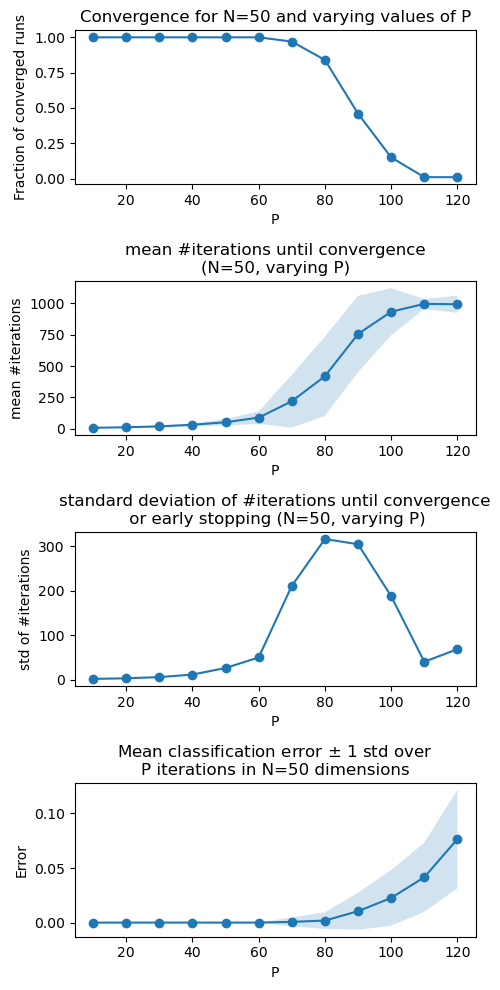

In [7]:
fig, axs = plt.subplots(4, 1, figsize=(5,10))

axs[0].plot(Ps, conv_ratios, '-o')
axs[0].set_title('Convergence for N=50 and varying values of P')
axs[0].set_xlabel('P')
axs[0].set_ylabel('Fraction of converged runs')

axs[1].plot(Ps, iter_means, '-o')
axs[1].set_title('mean #iterations until convergence\n(N=50, varying P)')
axs[1].fill_between(Ps, iter_means+iter_stds, iter_means-iter_stds, alpha=.2)
axs[1].set_xlabel('P')
axs[1].set_ylabel('mean #iterations')

axs[2].plot(Ps, iter_stds, '-o')
axs[2].set_title('standard deviation of #iterations until convergence\n or early stopping (N=50, varying P)')
axs[2].set_xlabel('P')
axs[2].set_ylabel('std of #iterations')

axs[3].plot(Ps, error_means, '-o')
axs[3].fill_between(Ps, error_means + error_stds, error_means-error_stds, alpha=.2)
axs[3].set_title('Mean classification error $\pm$ 1 std over\nP iterations in N=50 dimensions')
axs[3].set_xlabel('P')
axs[3].set_ylabel('Error')

fig.tight_layout()
plt.show()

# Perceptron 3

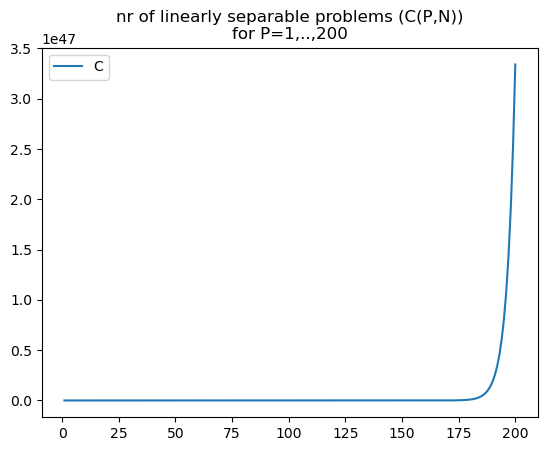

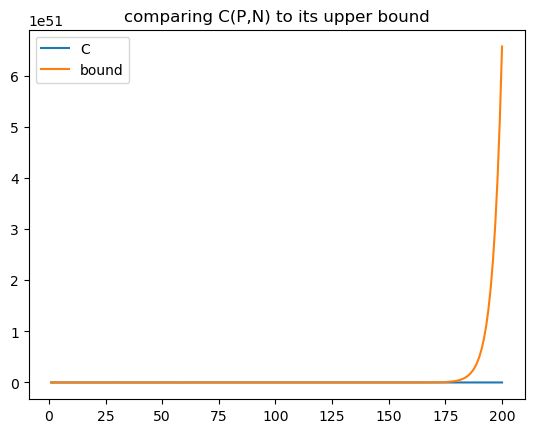

In [8]:
def c(P, N):
    sum = 0
    for i in range(N):
        sum += comb(P-1, i)
    return 2*sum

def bound(P, N):
    return (math.e * P / N)**N

N = 50
Ps = np.arange(1, 201, 1)

cs = []
bounds = []
for P in Ps:
    cs.append(c(P, N))
    bounds.append(bound(P, N))

plt.plot(Ps, cs, label='C')
plt.title('nr of linearly separable problems (C(P,N))\nfor P=1,..,200')
plt.legend()
plt.show()

plt.plot(Ps, cs, label='C')
plt.plot(Ps, bounds, label='bound')
plt.title('comparing C(P,N) to its upper bound')
plt.legend()
plt.show()

# Perceptron 4 a

$$
\delta = 4m(2P)\exp(-\frac{\epsilon^2P}{8}) \\
\epsilon = \sqrt{\frac{8}{P}\ln{(\frac{4m(2P)}{\delta})}} \\
\epsilon = \sqrt{ \frac{8}{P} \left( \ln \frac{4 (\frac{2eP}{N})^N }{\delta} \right)} \\
\epsilon = \sqrt{\frac{8}{P}} \sqrt{\ln 4 + N \ln(2eP) - N \ln N - \ln \delta}
$$

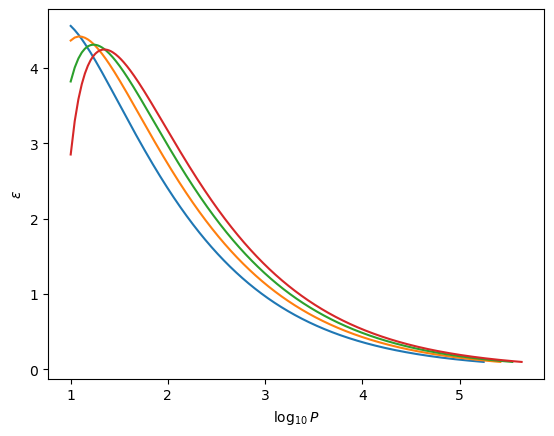

In [9]:
def epsilon(N, P, delta):
    return np.sqrt(8/P) * np.sqrt( np.log(4) + N * np.log(2 * np.e * P) - N * np.log(N) - np.log(delta) )

def d_vc(N, delta):
    epsilons = []
    # Ps = np.linspace(10, 1000, 1000)
    P = 10
    e = 4.0
    Ps = []
    while e >= 0.1:
        e = epsilon(N, P, delta)
        epsilons.append(e)
        Ps.append(P)
        P+=1
    # for P in Ps:
    #     e = epsilon(N, P, delta)
    #     epsilons.append(e)
        
    return Ps, epsilons


Ns = [20, 30, 40, 50]
delta = 0.01

Ps_per_N = []
epsilons_per_N = []

for N in Ns:
    Ps, epsilons = d_vc(N, delta)
    plt.plot(np.log(Ps) / np.log(10), np.array(epsilons), label=N)
    plt.xlabel("$\log_{10}P$")
    plt.ylabel("$\epsilon$")
    Ps_per_N.append(Ps)
    epsilons_per_N.append(epsilons)


Text(0.5, 1.0, 'The number of patterns required per dimension to \n find a generalization rate where $\\epsilon \\approx 0.1$')

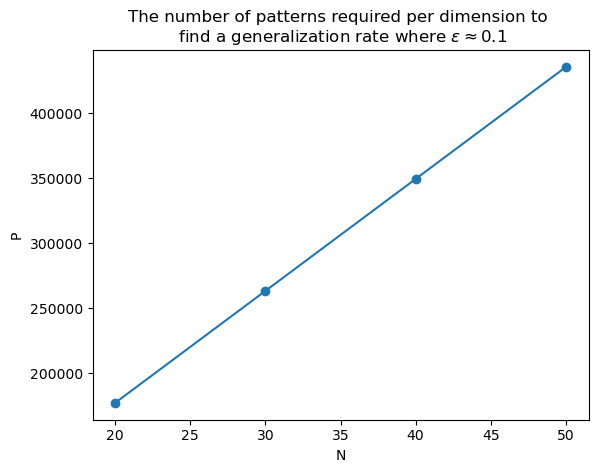

In [10]:
Ps_req_per_N = [Ps[-1] for Ps in Ps_per_N]

plt.plot(Ns, Ps_req_per_N, "-o")
plt.xlabel("N")
plt.ylabel("P")
plt.title("The number of patterns required per dimension to \n find a generalization rate where $\epsilon \\approx 0.1$")

# Perceptron 4 b

In [11]:
N = 10

In [12]:
P_test = 10_000
xi_test = np.random.choice([-1, 1], (N, P_test))
y_test = np.random.choice([-1, 1], P_test)

n_learning_runs = 100

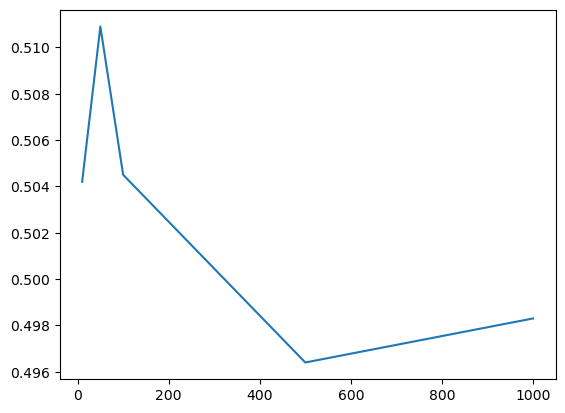

In [13]:
P_train_counts = np.array([10, 50, 100, 500, 1000]) 
generalization_errors = np.ones((n_learning_runs, len(P_train_counts)))
for i, P_train in enumerate(P_train_counts):
    # \bar{f}
    xi_train = np.random.choice([-1, 1], (N, P_train))
    w_0 = np.random.randn(1, N) # f
    # xi_train is N x P so to take the dot product 
    # of every pattern we have to transpose it xi_train
    # w must be transposed to make it a column vector 
    y = np.sign(xi_train.T @ w_0.T)

    xi_train_transformed = xi_train.T * y 

    for n in range(n_learning_runs):
        #f
        # w_0 is already trained so that is weight vector of \bar{f}
        # we have to find a weight vector that describes f
        w = np.random.randn(1, N)
        w, _, converged, _ = train_perceptron(w.squeeze(), xi_train_transformed, 0.1)
        y_eval = np.sign(xi_test.T @ w.T)
        # error is fraction of label that are not same
        e = (y_test != y_eval).sum() / P_test
        generalization_errors[n, i] = e
    
       
plt.plot(P_train_counts, generalization_errors.max(0))

In [14]:
import numpy as np

def compute_epsilon(P, N=10, delta=0.01):
    return np.sqrt(-8/P * np.log(delta / (4 * (np.e * 2 * P / N)**N)))

# Iterate over a range of P values
P_values = np.arange(1, 1000)  # You can adjust the range as needed
epsilon_values = [compute_epsilon(P) for P in P_values]

# Find the P where epsilon is closest to 0.1
P_target = P_values[np.argmin(np.abs(np.array(epsilon_values) - 0.1))]

print(f"For epsilon approximately 0.1, P is around {P_target}.")

For epsilon approximately 0.1, P is around 1.


/tmp/ipykernel_4659/3764285397.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-8/P * np.log(delta / (4 * (np.e * 2 * P / N)**N)))
